### sample one - modual one

In [3]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.strategy_one import backtest_strategy
from lib.performance_analysis import calculate_strategy_one_performance
from lib.backtest.backtest_adjusted import sensitivity_analysis
import pandas as pd

# 載入資料
df_original = pd.read_csv("../data/TPE-sample1.csv", encoding="utf-8")
print(f"資料載入成功，共 {len(df_original)} 筆。")

results_df = sensitivity_analysis(
    df_original=df_original,
    backtest_func=backtest_strategy,
    performance_func=calculate_strategy_one_performance,
    param_ranges={
        'ma_period': (10, 15),
        'bb_period': (20, 40),
        'bb_std': (1.0, 3.0),
        'drop_threshold': (0.5, 0.8)
    },
    iterations=500,
)
results_df

資料載入成功，共 1261 筆。
準備進行 500 次隨機參數測試...


執行進度:   0%|          | 0/500 [00:00<?, ?it/s]

,ma_period,bb_period,bb_std,drop_threshold,最終權益 (Mark-to-Market),淨利或淨損 (已實現),最大回撤 (MDD),總獲利 (已實現),總損失 (已實現),總交易次數,賺錢交易次數,虧錢交易次數,勝率,單次交易最大獲利,單次交易最大損失,獲利交易中的平均獲利,損失交易中的平均損失,賺賠比,最長的連續性獲利的次數,最長的連續性損失的次數
0,11,31,1.29,0.75,132.0,116.0,656.0,2087.0,-1971.0,56,18,38,32.14%,284.0,-134.0,115.944444,-51.868421,2.235357,3,7
1,15,21,1.32,0.75,-16.0,-32.0,912.0,2249.0,-2281.0,62,21,41,33.87%,289.0,-183.0,107.095238,-55.634146,1.924991,3,7
2,10,24,2.89,0.79,-18.0,-18.0,32.0,14.0,-32.0,2,1,1,50.00%,14.0,-32.0,14.000000,-32.000000,0.437500,1,1
3,11,23,1.43,0.70,31.0,31.0,932.0,1990.0,-1959.0,54,19,35,35.19%,261.0,-183.0,104.736842,-55.971429,1.871255,4,12
4,11,29,2.89,0.51,46.0,46.0,29.0,46.0,0.0,2,2,0,100.00%,32.0,0.0,23.000000,0.000000,inf,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15,36,1.58,0.55,334.0,318.0,515.0,1424.0,-1106.0,32,11,21,34.38%,251.0,-129.0,129.454545,-52.666667,2.457998,3,7
496,14,40,2.62,0.71,66.0,66.0,117.0,113.0,-47.0,4,3,1,75.00%,44.0,-47.0,37.666667,-47.000000,0.801418,3,1
497,11,35,1.34,0.78,-677.0,-693.0,1135.0,1576.0,-2269.0,55,12,43,21.82%,284.0,-148.0,131.333333,-52.767442,2.488908,2,10
498,10,21,2.90,0.67,124.0,124.0,29.0,124.0,0.0,2,2,0,100.00%,110.0,0.0,62.000000,0.000000,inf,2,0


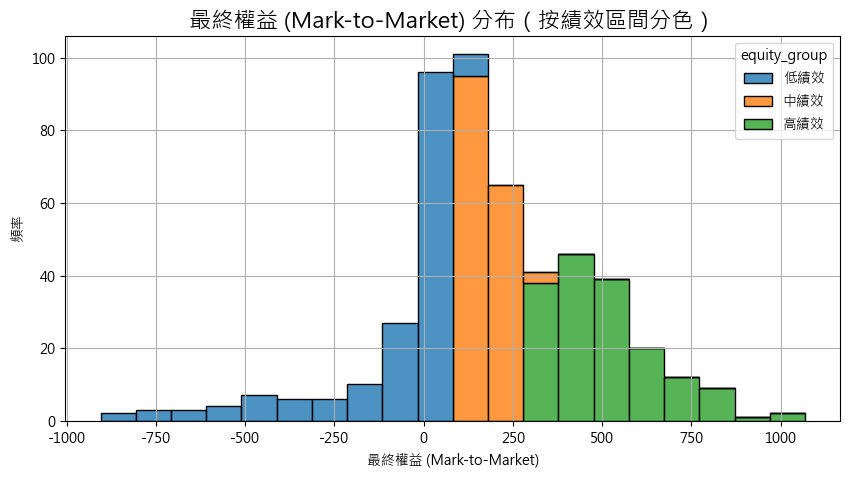

不同績效區間的策略參數中位數：


,ma_period,bb_period,bb_std,drop_threshold
equity_group,,,,
低績效,12.0,32.0,1.95,0.65
中績效,12.0,31.0,2.28,0.66
高績效,12.0,26.0,1.83,0.64


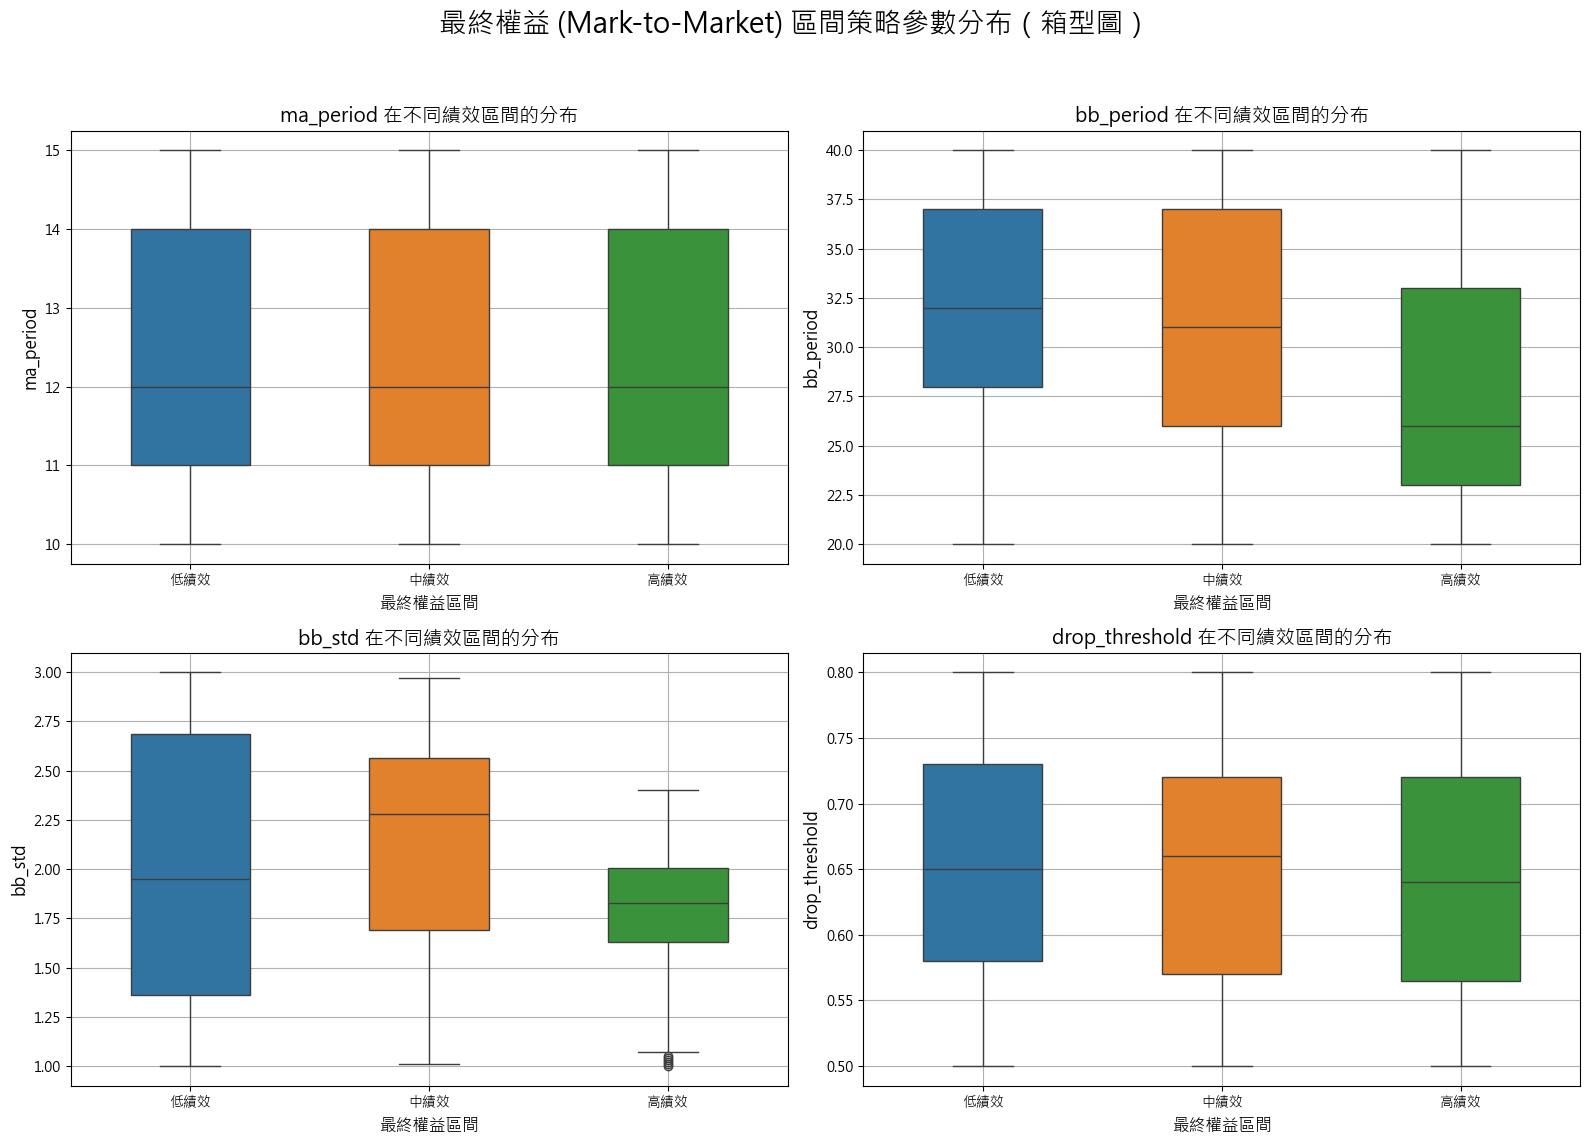

In [4]:
%reload_ext autoreload
%autoreload 2

from lib.backtest.backtest_adjusted import plot_strategy_sensitivity


plot_strategy_sensitivity(
    results_df,
    equity_col='最終權益 (Mark-to-Market)',
    param_cols=['ma_period','bb_period','bb_std','drop_threshold'],
    group_labels=['低績效','中績效','高績效'],
)
